In [25]:
#K-MEANS IN DIGITS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import seaborn as sns; sns.set()  # for plot styling

digits = load_digits()
digits.data.shape

(1797, 64)

In [41]:
# Initializing KMeans
c_n=10#select the number of clusters
kmeans = KMeans(n_clusters=c_n, random_state=0)
#clusters = kmeans.fit_predict(digits.data)
#kmeans.cluster_centers_.shape
# Fitting with inputs
kmeans = kmeans.fit(digits.data)
# Predicting the clusters
labels = kmeans.predict(digits.data)
C = kmeans.cluster_centers_
print(C.shape)



(10, 64)


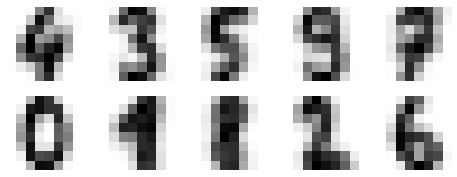

In [42]:
i_n=round(c_n/2)
fig, ax = plt.subplots(2, i_n, figsize=(8, 3))
centers = C.reshape(c_n, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [43]:
# loading the true labels from the data
from scipy.stats import mode

labels2 = np.zeros_like(labels)
for i in range(10):
    mask = (labels == i)#what the k-means recognized as this class (indexes)
    labels2[mask] = mode(digits.target[mask])[0]#mode returns the minimum value with the most number of apperances

In [44]:
mode([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0 ,0,0,0,0,0])

ModeResult(mode=array([0]), count=array([7]))

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels2)

0.7935447968836951

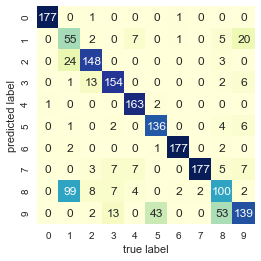

In [46]:
#checking the confussion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');
